## Transperancy using Logistic Regression

### 1. Choosing a binary classification dataset

Dataset: Communities and Crime Dataset UCI repository Total continous features: 51
The dataset consists of features like race, population, employment, immigrants and feature per capita violent crimes was calculated using population other features above. Our task is to predict the features that affect this per capita violent crimes(Violent crimes per population)

By looking at the data, for classification purposes, a new feature 'High Crime' was added using mean of per capita violent crimes which is a target feature. Thus, 'High Crime' is y(Target feature). Note: If per capita violent crimes >= 0.3, High Crime = 1 else High Crime = -1

Feature names: Community name Population Householdsize Race percent Black Race Percent White Race Percent Asian Race Percent Hispanic WhitePerCap : Per capita income for White and so on

### 2. Loading and binarizing the dataset

In [475]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("C:\\Users\\Prajakta\\CRIME_DATA.csv")
df

,﻿communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,...,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,Alabastercity,0.01,0.61,0.21,0.83,0.02,0.01,0.29,0.27,0.16,...,0.25,0.00,0.00,0.03,0.70,0.05,0.06,0.01,0.00,0.06
1,AlexanderCitycity,0.01,0.41,0.55,0.57,0.01,0.00,0.29,0.15,0.00,...,0.36,0.00,0.00,0.00,0.93,0.11,0.03,0.01,0.00,0.14
2,Annistoncity,0.03,0.34,0.86,0.30,0.04,0.01,0.35,0.15,0.26,...,0.47,0.01,0.02,0.04,0.77,0.06,0.11,0.04,0.00,1.00
3,Athenscity,0.01,0.38,0.35,0.71,0.04,0.01,0.30,0.18,0.19,...,0.33,0.00,0.00,0.03,0.78,0.09,0.05,0.00,0.00,0.23
4,Auburncity,0.04,0.37,0.32,0.70,0.21,0.02,0.19,0.16,0.07,...,0.24,0.00,0.00,0.12,0.49,0.09,0.09,0.01,0.00,0.15
5,Bessemercity,0.04,0.44,1.00,0.10,0.00,0.00,0.21,0.16,0.08,...,0.60,0.00,0.05,0.00,0.96,0.11,0.07,0.13,0.00,1.00
6,Birminghamcity,0.41,0.37,1.00,0.02,0.03,0.01,0.33,0.19,0.16,...,0.47,0.32,0.53,0.03,0.90,0.43,0.15,0.20,0.38,1.00
7,Cullmancity,0.01,0.30,0.00,0.99,0.02,0.01,0.24,0.00,0.12,...,0.28,0.00,0.00,0.00,0.82,0.04,0.07,0.01,0.00,0.16
8,Daphnecity,0.00,0.39,0.31,0.75,0.02,0.02,0.46,0.22,0.43,...,0.24,0.00,0.00,0.03,0.60,0.03,0.08,0.01,0.00,0.05
9,Decaturcity,0.06,0.39,0.32,0.73,0.04,0.01,0.35,0.19,0.19,...,0.24,0.01,0.00,0.03,0.71,0.14,0.09,0.01,0.00,0.22


In [476]:
#Mean of ViolentCrimesPerPop for Target Feature 
# If ViolentCrimesperPop > 0.3, then High Crime = -1 else 1 
# High Crime is our new Target Feature
df['High Crime'] = np.where(df['ViolentCrimesPerPop'] > 0.3, -1, 1)

In [477]:
df.head(5)

,﻿communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,High Crime
0,Alabastercity,0.01,0.61,0.21,0.83,0.02,0.01,0.29,0.27,0.16,...,0.00,0.00,0.03,0.70,0.05,0.06,0.01,0.0,0.06,1
1,AlexanderCitycity,0.01,0.41,0.55,0.57,0.01,0.00,0.29,0.15,0.00,...,0.00,0.00,0.00,0.93,0.11,0.03,0.01,0.0,0.14,1
2,Annistoncity,0.03,0.34,0.86,0.30,0.04,0.01,0.35,0.15,0.26,...,0.01,0.02,0.04,0.77,0.06,0.11,0.04,0.0,1.00,-1
3,Athenscity,0.01,0.38,0.35,0.71,0.04,0.01,0.30,0.18,0.19,...,0.00,0.00,0.03,0.78,0.09,0.05,0.00,0.0,0.23,1
4,Auburncity,0.04,0.37,0.32,0.70,0.21,0.02,0.19,0.16,0.07,...,0.00,0.00,0.12,0.49,0.09,0.09,0.01,0.0,0.15,1


In [478]:
#Binarize continous features using mean
def calc_mean(features):
    for feature in features:
        feature_mean = df[feature].mean()
        df[feature] = np.where(df[feature] < feature_mean, '0', '1')

In [479]:
# Calculating Mean of continous features and replacing with 1 and 0 according to the calcmean function
calc_mean([
'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'RentLowQ',
 'RentMedian',
 'RentHighQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumInShelters',
 'NumStreet',
 'PctForeignBorn',
 'PctBornSameState',
 'LandArea',
 'PopDens',
 'PctUsePubTrans',
 'LemasPctOfficDrugUn'])

In [480]:
df.head(5)

,﻿communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,High Crime
0,Alabastercity,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.06,1
1,AlexanderCitycity,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0.14,1
2,Annistoncity,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1.00,-1
3,Athenscity,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0.23,1
4,Auburncity,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.15,1


In [481]:
# Drop features  
df.drop('ViolentCrimesPerPop',axis = 1, inplace=True)
#Drop Community Name as it is unique
# Taking results into a new dataframe df1
df1 = df.drop(df.columns[0], axis=1)

In [482]:
df1.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,...,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,High Crime
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,-1
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [483]:
# Taking the features and target into an array 
# An object is a row containing feature and row values, thus we take every sample into an array of objects
df_list = np.array(df1).astype('int')
X = df_list[:, 0:48]
#print(X)
y = df_list[:, 49]
#print(y)

In [484]:
feature_list = list(df1)
feature_list.remove("High Crime")
feature_list

['population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'RentLowQ',
 'RentMedian',
 'RentHighQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumInShelters',
 'NumStreet',
 'PctForeignBorn',
 'PctBornSameState',
 'LandArea',
 'PopDens',
 'PctUsePubTrans',
 'LemasPctOfficDrugUn']

### 3. Train-Test splitting of dataset

In [485]:
import pickle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

## 4. Important Features

### 1. Train an L2-regularized LogisticRegression classifier on the train split; use the default parameters for all, except penalty should be set to l2. Print the top 10 features and their weights (i.e., the features that have the highest absolute values).

In [486]:
clf = LogisticRegression(penalty='l2') 
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [487]:
w = clf.coef_
w = w[0]
wf = zip(w, feature_list)
c = sorted(wf, reverse=True)
print("Top 10 features and their weights (i.e., the features that have the highest absolute values): ")
c[:10]

Top 10 features and their weights (i.e., the features that have the highest absolute values): 


[(1.0183328659872655, 'blackPerCap'),
 (0.94008641470283083, 'PctSpeakEnglOnly'),
 (0.7207704784725053, 'PctBSorMore'),
 (0.7064995146120927, 'racePctAsian'),
 (0.69581342615304531, 'racePctHisp'),
 (0.64117365040517404, 'PctEmploy'),
 (0.58935803562571276, 'racePctWhite'),
 (0.54998108364362386, 'PctRecImmig8'),
 (0.51321725746887004, 'PctImmigRec10'),
 (0.42265539705904265, 'AsianPerCap')]

### 2. Train an L1-regularized LogisticRegression classifier on the train split; use the default parameters for all, except penalty should be set to l1. Print the top 10 features and their weights (i.e., the features that have the highest absolute values).

In [488]:
clf = LogisticRegression(penalty='l1') 
clf.fit(X_train, y_train)
w = clf.coef_
w = w[0]
wf = zip(w, feature_list)
c = sorted(wf, reverse=True)
print("Top 10 features and their weights (i.e., the features that have the highest absolute values): ")
c[:10]

Top 10 features and their weights (i.e., the features that have the highest absolute values): 


[(0.98517738382003461, 'blackPerCap'),
 (0.89520515796948819, 'PctSpeakEnglOnly'),
 (0.74060946810689787, 'PctBSorMore'),
 (0.53745932875895097, 'racePctHisp'),
 (0.52606067955148772, 'PctEmploy'),
 (0.51547245131109976, 'racePctAsian'),
 (0.50131048650844101, 'PctImmigRec10'),
 (0.48610541757918402, 'racePctWhite'),
 (0.37990600614247044, 'AsianPerCap'),
 (0.24467012963228724, 'PctRecImmig8')]

### 3. Train a DecisionTreeClassifier  on the train split; use the default parameters for all, except max_depth=6, min_impurity_decrease=0.005. Visualize your tree in the notebook itself.

In [489]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
dt = DecisionTreeClassifier(max_depth = 6, min_impurity_split = 0.005)
dt.fit(X_train,y_train)
def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

visualize_tree(dt, feature_list)


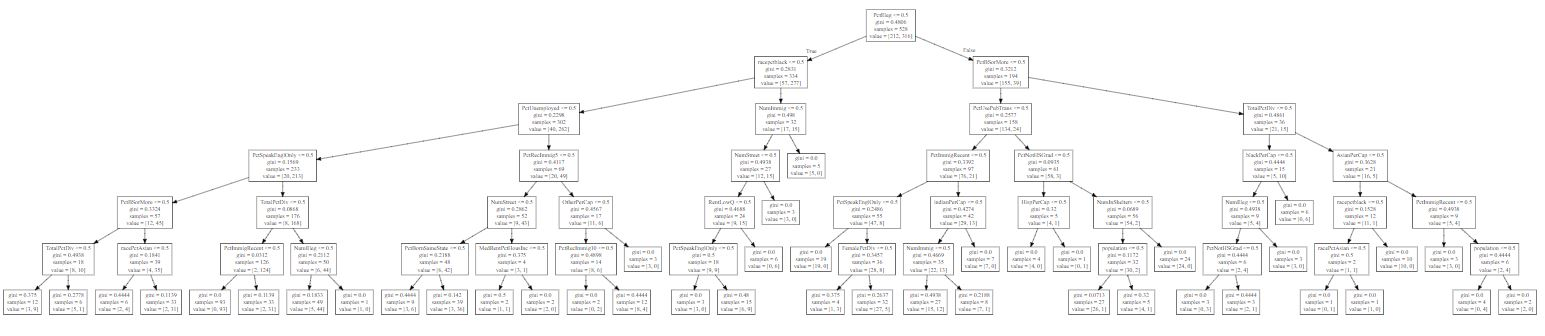

In [490]:
from IPython.display import Image
Image(filename='C:\\Users\\Prajakta\\TreeData3.jpg')

In [491]:
wf = zip(dt.feature_importances_, feature_list)
c = sorted(wf, reverse=True)
print("Top 10 features and their weights: ")
c[:10]

Top 10 features and their weights: 


[(0.42700031476081229, 'PctIlleg'),
 (0.062611341835205919, 'racepctblack'),
 (0.061335373040699012, 'PctUnemployed'),
 (0.040066110016596032, 'NumIlleg'),
 (0.029771783411154204, 'racePctWhite'),
 (0.028614597205518452, 'PctRecImmig10'),
 (0.027348955394890448, 'FemalePctDiv'),
 (0.025738990289228332, 'PctEmploy'),
 (0.023233503685424473, 'PctUsePubTrans'),
 (0.022081588534532227, 'PctBornSameState')]

### 4. Discuss your results.

The top most features for both L1 and L2 logistic regression are almost same compared to Decision tree classifier. Some of the features are common to all of them like 'PctBSorMore'(percentage of people 25 and over with a bachelors degree or higher education).

The key features affecting crime rate using L1 and L2 regression are: 

'PctBSorMore' : Percentage of people 25 and over with a bachelors degree or higher education

'blackPerCap' : Per capita income for african americans

'PctSpeakEnglOnly' : Percent of people who speak only English

'LandArea' :  Land area in square miles

'PctImmigRec5': Percentage of _immigrants_ who immigated within last 5 years

'racePctWhite' : Percentage of population that is caucasian

'racePctAsian' : Percentage of population that is of asian heritage

'PctImmigRecent': Percentage of _immigrants_ who immigated within last 3 years

'AsianPerCap' : Per capita income for people with asian heritage

'PctEmploy' : Percentage of people 16 and over who are employed 


### 5. Now z-score all features using StandardScaler. z-score both train and test. use fit_transform on train, and transform on test.

In [492]:
from sklearn.preprocessing import StandardScaler
std_scaled_data = StandardScaler()
X_train = std_scaled_data.fit_transform(X_train)
X_test = std_scaled_data.transform(X_test)
a = {}
a['X_train'] = X_train
a['y_train'] = y_train
a['X_test'] = X_test
a['y_test'] = y_test
a['target_names'] = 'High Crime'
a['feature_names'] = feature_list
pickle.dump(a, open("pyerpudedata3.pickle", "wb"))


C:\Users\Prajakta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### 6. Repeat steps 1-4 (i.e., train L2-LR, print top 10 features and their weights, and so on) using the scaled version of the data and discuss your results.

#### L2-regularized LogisticRegression on scaled data

In [493]:
clfL2 = LogisticRegression(penalty='l2') 
clfL2.fit(X_train, y_train)
w = clf.coef_
w = w[0]
wf = zip(w, feature_list)
c = sorted(wf, reverse=True)
print("Top 10 features and their weights (i.e., the features that have the highest absolute values): ")
c[:10]

Top 10 features and their weights (i.e., the features that have the highest absolute values): 


[(0.98517738382003461, 'blackPerCap'),
 (0.89520515796948819, 'PctSpeakEnglOnly'),
 (0.74060946810689787, 'PctBSorMore'),
 (0.53745932875895097, 'racePctHisp'),
 (0.52606067955148772, 'PctEmploy'),
 (0.51547245131109976, 'racePctAsian'),
 (0.50131048650844101, 'PctImmigRec10'),
 (0.48610541757918402, 'racePctWhite'),
 (0.37990600614247044, 'AsianPerCap'),
 (0.24467012963228724, 'PctRecImmig8')]

#### L1-regularized LogisticRegression on scaled data

In [494]:
clf = LogisticRegression(penalty='l1') 
clf.fit(X_train, y_train)
w = clf.coef_
w = w[0]
wf = zip(w, feature_list)
c = sorted(wf, reverse=True)
print("Top 10 features and their weights (i.e., the features that have the highest absolute values): ")
c[:10]

Top 10 features and their weights (i.e., the features that have the highest absolute values): 


[(0.54325013083398133, 'blackPerCap'),
 (0.45166655054682547, 'PctSpeakEnglOnly'),
 (0.37370206471947698, 'PctBSorMore'),
 (0.337290402280918, 'PctRecImmig8'),
 (0.31388574894928878, 'racePctHisp'),
 (0.29383100868556333, 'racePctAsian'),
 (0.29230807695493366, 'PctImmigRec10'),
 (0.28731002728559124, 'PctEmploy'),
 (0.1955360831306853, 'racePctWhite'),
 (0.18099101141362689, 'AsianPerCap')]

#### Decision Tree on scaled data

In [495]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 6, min_impurity_split = 0.005)
dt.fit(X_train, y_train)
def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

visualize_tree(dt, feature_list)

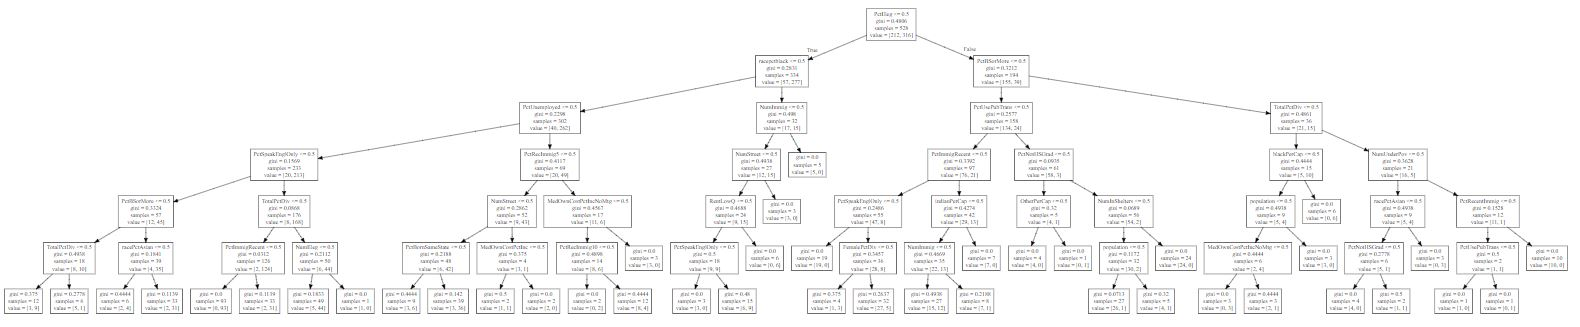

In [496]:
from IPython.display import Image
Image(filename='C:\\Users\\Prajakta\\TreeData3_Scaled.jpg')

In [497]:
wf = zip(dt.feature_importances_, feature_list)
c = sorted(wf, reverse=True)
print("Top 10 features and their weights: ")
c[:10]

Top 10 features and their weights: 


[(0.42447948469868474, 'PctIlleg'),
 (0.062241710836650928, 'racepctblack'),
 (0.060973274824637012, 'PctUnemployed'),
 (0.049175973514296034, 'racePctWhite'),
 (0.039990637898099902, 'TotalPctDiv'),
 (0.039829576573619713, 'NumIlleg'),
 (0.028445668672311755, 'PctRecImmig10'),
 (0.027187498678012279, 'FemalePctDiv'),
 (0.023611752687325977, 'blackPerCap'),
 (0.020856903448829713, 'NumUnderPov')]

#### Discuss your results

The top 10 features on the scaled data are also similar as that performed on non scaled data. The features are same for both L2 and L1 Logistic regression. Same is the case with Decision Trees. 

### 5. Evidence

#### Using the z-scored version of the data, for the following types of objects, create a section, and print a) the total positive evidence,  b) the total negative evidence, c) probability distribution, d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence.

In [498]:
X_predicted_probability = clfL2.predict_proba(X_test)

In [499]:
# Calculating evidences for all objects in X_test for further usage
# object_arr contains feature values of objects
positive_evidences_list = []
negative_evidences_list = []
positive_features_list = []
negative_features_list = []

for object_arr in X_test:
    object_arr_length = len(object_arr)
    positive_evidence = 0
    negative_evidence = 0
    positive_features = []
    negative_features = []
    
    for i in range(object_arr_length):
        evidence = clfL2.coef_[0][i] * object_arr[i]
        if evidence >= 0:
            positive_evidence += evidence
            positive_features.append((i, evidence))
        else:
            negative_evidence += evidence 
            negative_features.append((i, evidence))
            
    positive_evidences_list.append(positive_evidence)
    negative_evidences_list.append(negative_evidence)
    positive_features_list.append(positive_features)
    negative_features_list.append(negative_features)

### 5 - 1. The most positive object with respect to the probabilities.

In [500]:
most_positive_object_ix = np.argmax(X_predicted_probability[:, 1])
print(" 5 - 1 --> The most positive object is at index", most_positive_object_ix)
print(" 5 - 1a) --> The total positive evidence = ", positive_evidences_list[most_positive_object_ix])
print(" 5 - 1b) --> The total negative evidence = ", negative_evidences_list[most_positive_object_ix])
print(" 5 - 1c) --> Probability Distribution = ", X_predicted_probability[most_positive_object_ix])
#Top 3 features values that contribute most to the positive evidence
top_3_pos_feature = sorted(positive_features_list[most_positive_object_ix], key=lambda x: x[1], reverse=True)[:3]
print(" 5 - 1d) --> Top 3 features contributing most to positive evidence:")
for item in top_3_pos_feature:
    print("            ", feature_list[item[0]], "    ", item[1])
    
#Top 3 features values that contribute most to the negative evidence
top_3_neg_feature = sorted(negative_features_list[most_positive_object_ix], key=lambda x: x[1])[:3]
print(" 5 - 1e) --> Top 3 features contributing most to negative evidence:")
for item in top_3_neg_feature:
    print("            ", feature_list[item[0]], "    ", item[1])

 5 - 1 --> The most positive object is at index 45
 5 - 1a) --> The total positive evidence =  7.7735171749
 5 - 1b) --> The total negative evidence =  -2.62124868258
 5 - 1c) --> Probability Distribution =  [ 0.00230719  0.99769281]
 5 - 1d) --> Top 3 features contributing most to positive evidence:
             blackPerCap      0.65495408445
             PctImmigRec5      0.53746443704
             PctRecentImmig      0.518623222278
 5 - 1e) --> Top 3 features contributing most to negative evidence:
             PctRecImmig8      -0.387948261241
             HispPerCap      -0.262255614521
             racePctHisp      -0.260532211285


### 5 - 2. The most negative object with respect to the probabilities.

In [501]:
most_negative_object_ix = np.argmax(X_predicted_probability[:, 0])
print(" 5 - 2 --> The most negative object is at index", most_negative_object_ix)
print(" 5 - 2a) --> The total positive evidence = ", positive_evidences_list[most_negative_object_ix])
print(" 5 - 2b) --> The total negative evidence = ", negative_evidences_list[most_negative_object_ix])
print(" 5 - 2c) --> Probability Distribution = ", X_predicted_probability[most_negative_object_ix])

#print("d)Total features contributing to positive evidence: ",positive_features)
#print("e)Total features contributing to negative evidence: ",negative_features)

#Top 3 features values that contribute most to the positive evidence
top_3_pos_feature = sorted(positive_features_list[most_negative_object_ix], key=lambda x: x[1], reverse=True)[:3]
print(" 5 - 2d) --> Top 3 features contributing most to positive evidence:")
for item in top_3_pos_feature:
    print("            ", feature_list[item[0]], "    ", item[1])
    
#Top 3 features values that contribute most to the negative evidence
top_3_neg_feature = sorted(negative_features_list[most_negative_object_ix], key=lambda x: x[1])[:3]
print(" 5 - 2e) --> Top 3 features contributing most to negative evidence:")
for item in top_3_neg_feature:
    print("            ", feature_list[item[0]], "    ", item[1])

 5 - 2 --> The most negative object is at index 63
 5 - 2a) --> The total positive evidence =  3.48996733968
 5 - 2b) --> The total negative evidence =  -11.3234516223
 5 - 2c) --> Probability Distribution =  [  9.99009529e-01   9.90470822e-04]
 5 - 2d) --> Top 3 features contributing most to positive evidence:
             PctRecImmig8      0.789274048732
             PctRecImmig5      0.453361151439
             PctImmigRec10      0.308185933684
 5 - 2e) --> Top 3 features contributing most to negative evidence:
             racepctblack      -1.23324233314
             PctRecentImmig      -1.02845622045
             PctSpeakEnglOnly      -0.721626020453


### 5 - 3. The object that has the largest positive evidence.

In [502]:
# Derive index of maximum value from the positive evidences list 
largest_positive_evidence_ix = positive_evidences_list.index(max(positive_evidences_list))
print(" 5 - 3 --> The object having largest positive evidence is at index", largest_positive_evidence_ix)

print(" 5 - 3a) --> The total positive evidence = ", positive_evidences_list[largest_positive_evidence_ix])
print(" 5 - 3b) --> The total negative evidence = ", negative_evidences_list[largest_positive_evidence_ix])
print(" 5 - 3c) --> Probability Distribution = ", X_predicted_probability[largest_positive_evidence_ix])

#print("d)Total features contributing to positive evidence: ",positive_features)
#print("e)Total features contributing to negative evidence: ",negative_features)

#Top 3 features values that contribute most to the positive evidence
top_3_pos_feature = sorted(positive_features_list[largest_positive_evidence_ix], key=lambda x: x[1], reverse=True)[:3]
print(" 5 - 3d) --> Top 3 features contributing most to positive evidence:")
for item in top_3_pos_feature:
    print("            ", feature_list[item[0]], "    ", item[1])
    
#Top 3 features values that contribute most to the negative evidence
top_3_neg_feature = sorted(negative_features_list[largest_positive_evidence_ix], key=lambda x: x[1])[:3]
print(" 5 - 3e) --> Top 3 features contributing most to negative evidence:")
for item in top_3_neg_feature:
    print("            ", feature_list[item[0]], "    ", item[1])

 5 - 3 --> The object having largest positive evidence is at index 23
 5 - 3a) --> The total positive evidence =  8.5385292635
 5 - 3b) --> The total negative evidence =  -3.81721103066
 5 - 3c) --> Probability Distribution =  [ 0.00354572  0.99645428]
 5 - 3d) --> Top 3 features contributing most to positive evidence:
             PctRecImmig8      0.789274048732
             blackPerCap      0.65495408445
             racePctAsian      0.606197300383
 5 - 3e) --> Top 3 features contributing most to negative evidence:
             PctSpeakEnglOnly      -0.721626020453
             PctRecImmig10      -0.522335456064
             RentMedian      -0.314678658297


### 5 - 4. The object that has the largest(in magnitude) negative evidence.

In [503]:
# Derive index of maximum value from the negative evidences list 
largest_negative_evidence_ix = negative_evidences_list.index(min(negative_evidences_list))
print(" 5 - 4 --> The object having the largest (in magnitude) negative evidence is at index", largest_negative_evidence_ix)
print(" 5 - 4a) --> The total positive evidence = ", positive_evidences_list[largest_negative_evidence_ix])
print(" 5 - 4b) --> The total negative evidence = ", negative_evidences_list[largest_negative_evidence_ix])
print(" 5 - 4c) --> Probability Distribution = ", X_predicted_probability[largest_negative_evidence_ix])

#print("d)Total features contributing to positive evidence: ",positive_features)
#print("e)Total features contributing to negative evidence: ",negative_features)

#Top 3 features values that contribute most to the positive evidence
top_3_pos_feature = sorted(positive_features_list[largest_negative_evidence_ix], key=lambda x: x[1], reverse=True)[:3]
print(" 5 - 4d) --> Top 3 features contributing most to positive evidence:")
for item in top_3_pos_feature:
    print("            ", feature_list[item[0]], "    ", item[1])
    
#Top 3 features values that contribute most to the negative evidence
top_3_neg_feature = sorted(negative_features_list[largest_negative_evidence_ix], key=lambda x: x[1])[:3]
print(" 5 - 4e) --> Top 3 features contributing most to negative evidence:")
for item in top_3_neg_feature:
    print("            ", feature_list[item[0]], "    ", item[1])

 5 - 4 --> The object having the largest (in magnitude) negative evidence is at index 63
 5 - 4a) --> The total positive evidence =  3.48996733968
 5 - 4b) --> The total negative evidence =  -11.3234516223
 5 - 4c) --> Probability Distribution =  [  9.99009529e-01   9.90470822e-04]
 5 - 4d) --> Top 3 features contributing most to positive evidence:
             PctRecImmig8      0.789274048732
             PctRecImmig5      0.453361151439
             PctImmigRec10      0.308185933684
 5 - 4e) --> Top 3 features contributing most to negative evidence:
             racepctblack      -1.23324233314
             PctRecentImmig      -1.02845622045
             PctSpeakEnglOnly      -0.721626020453


### 5 - 5. The most uncertain object (the probabilities are closest to 0.5)

In [504]:
# The uncertain object index is derived by using minimum difference between the values of X_predict_probability of X_test 
# which is close to 0.5 and values at index 151 had the minimum difference

uncertain_object_ix = 151
print(" 5 - 5 --> The most uncertain object is at index", uncertain_object_ix)

print(" 5 - 5a) --> The total positive evidence = ", positive_evidences_list[uncertain_object_ix])
print(" 5 - 5b) --> The total negative evidence = ", negative_evidences_list[uncertain_object_ix])
print(" 5 - 5c) --> Probability Distribution = ", X_predicted_probability[uncertain_object_ix])

#print("d)Total features contributing to positive evidence: ",positive_features)
#print("e)Total features contributing to negative evidence: ",negative_features)

#Top 3 features values that contribute most to the positive evidence
top_3_pos_feature = sorted(positive_features_list[uncertain_object_ix], key=lambda x: x[1], reverse=True)[:3]
print(" 5 - 5d) --> Top 3 features contributing most to positive evidence:")
for item in top_3_pos_feature:
    print("            ", feature_list[item[0]], "    ", item[1])
    
#Top 3 features values that contribute most to the negative evidence
top_3_neg_feature = sorted(negative_features_list[uncertain_object_ix], key=lambda x: x[1])[:3]
print(" 5 - 5e) --> Top 3 features contributing most to negative evidence:")
for item in top_3_neg_feature:
    print("            ", feature_list[item[0]], "    ", item[1])

 5 - 5 --> The most uncertain object is at index 151
 5 - 5a) --> The total positive evidence =  5.88345505842
 5 - 5b) --> The total negative evidence =  -8.12520519313
 5 - 5c) --> Probability Distribution =  [ 0.78994685  0.21005315]
 5 - 5d) --> Top 3 features contributing most to positive evidence:
             PctRecImmig8      0.789274048732
             racePctAsian      0.606197300383
             racePctHisp      0.578254420168
 5 - 5e) --> Top 3 features contributing most to negative evidence:
             PctRecentImmig      -1.02845622045
             PctSpeakEnglOnly      -0.721626020453
             NumImmig      -0.624074542232
